<h1 style="color:blue; font-size:40px; text-align:center;">
EN 3150 Assignment 1 on Learning from data and related challenges and linear models for regression
</h1>

<h3 style="color:gray; font-size:24px; text-align:center;">
Index: 220276V    Name: Jayathissa M.P.N.V.
</h3>

## Q1: Linear regression impact on outliers

In [3]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

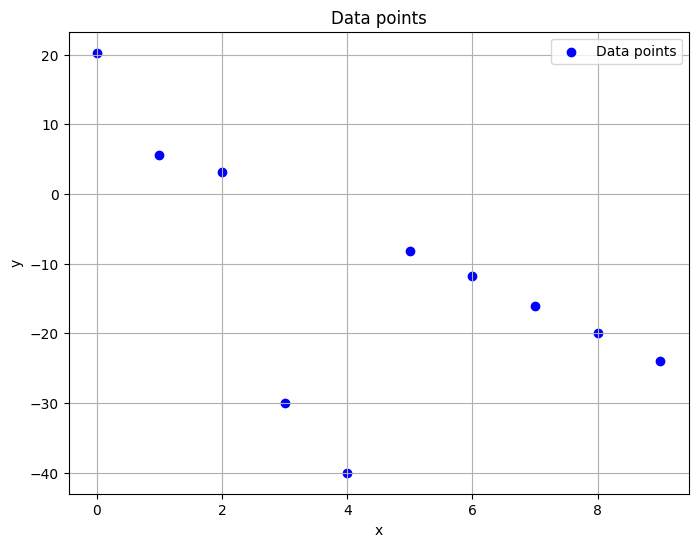

In [2]:
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=float)
y = np.array([20.26, 5.61, 3.14, -30.00, -40.00, -8.13, -11.73, -16.08, -19.95, -24.03], dtype=float)

plt.figure(figsize=(8,6))
plt.scatter(x, y, color='blue', label='Data points')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.title('Data points')
plt.show()


In [6]:
# Linear Regression model

m, c = np.polyfit(x, y, 1)  # slope and intercept
print(f"Regression Model: y = {m:.2f}x + {c:.2f}")


Regression Model: y = -3.56x + 3.92


In [7]:
# Predictions for plotting
y_pred = m * x + c
print(y_pred)

[  3.91672727   0.35945455  -3.19781818  -6.75509091 -10.31236364
 -13.86963636 -17.42690909 -20.98418182 -24.54145455 -28.09872727]


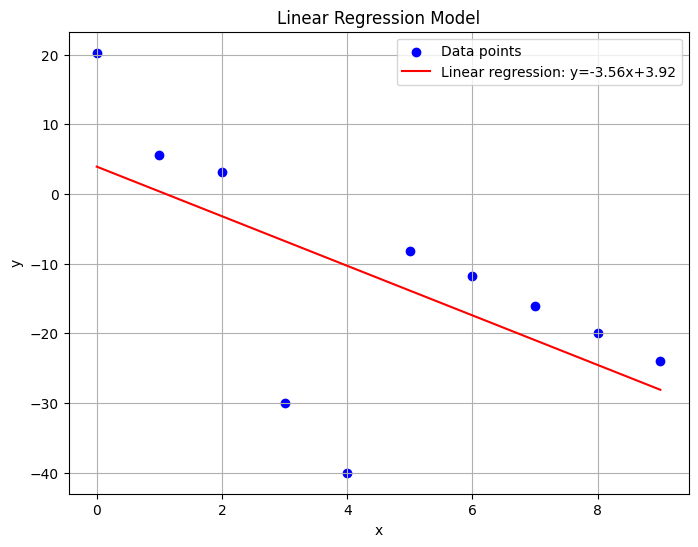

In [8]:
# Plot
plt.figure(figsize=(8,6))
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, y_pred, color='red', label=f'Linear regression: y={m:.2f}x+{c:.2f}')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.title('Linear Regression Model')
plt.show()

In [10]:
# function to compute L

def robust_loss(y_true, y_pred, beta):
    residuals = y_true - y_pred
    return np.mean((residuals**2) / (residuals**2 + beta**2))


In [15]:
# Model 1
m1, c1 = -4, 12
y_pred1 = m1 * x + c1

# Model 2 (from regression)
m2, c2 = m, c
y_pred2 = m2 * x + c2

# Beta values
betas = [1, 1e-6, 1e3]

print("Loss values for each model:")
for beta in betas:
    L1 = robust_loss(y, y_pred1, beta)
    L2 = robust_loss(y, y_pred2, beta)
    print(f"β = {beta}: Model 1 Loss = {L1:.4f}, Model 2 Loss = {L2:.4f}")


Loss values for each model:
β = 1: Model 1 Loss = 0.4354, Model 2 Loss = 0.9732
β = 1e-06: Model 1 Loss = 1.0000, Model 2 Loss = 1.0000
β = 1000.0: Model 1 Loss = 0.0002, Model 2 Loss = 0.0002


#### A suitable $\beta$ value for this dataset is $\beta = 1$.

- When β is extremely small $10^{-6}$, the loss function behaves almost like MSE, large residuals (from outliers) dominate, and the robust estimator does not provide benefit.
- When β is extremely large $10^{3}$, all residuals are heavily down-weighted, so the loss values become almost zero and the model’s ability to distinguish between good fits and poor fits is lost.
- A moderate β (such as 1) balances these effects:


#### Using β = 1, we get:

- Model 1 loss = 0.4354
- Model 2 loss = 0.9732
Since the robust loss is lower for Model 1, it means that under the robust metric, Model 1 provides a better fit to the majority of the data points when the influence of outliers is reduced.

#### Justification

The robust estimator with β = 1 down-weights the extreme negative values in the dataset (outliers), so the loss is dominated by how well the model fits the remaining points. In this context, Model 1’s slope and intercept align better with the non-outlier points, giving it a smaller loss.




The robust estimator reduces outlier impact by modifying the loss contribution from each point:

- For small residuals ($|y_i - \hat{y}_i| \ll \beta$), the loss behaves almost like squared error, so inliers are weighted strongly.

- For large residuals ($|y_i - \hat{y}_i| \gg \beta$), the denominator grows faster than the numerator, making the fraction approach 1 for small $\beta$ or a small value for larger $\beta$. This limits the maximum contribution any single outlier can make to the total loss.

In short, it caps the influence of points with very large errors so they don’t distort the model fitting process.


### Huber Loss

The Huber Loss is defined as:

$$
L_\delta(a) =
\begin{cases}
\frac{1}{2} a^2, & \text{if } |a| \leq \delta \\
\delta \left( |a| - \frac{\delta}{2} \right), & \text{if } |a| > \delta
\end{cases}
$$

**Why use Huber Loss?**
- It behaves like MSE for small errors (good sensitivity for inliers).
- It behaves like MAE (absolute error) for large errors (reducing outlier influence).



## Q2: Loss Function


In [1]:
import numpy as np

# True value
y_true = 1

# Prediction values given in the question
preds = np.array([0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 
                  0.6, 0.7, 0.8, 0.9, 1.0])

# Small epsilon to avoid log(0) errors
eps = 1e-12
preds_clipped = np.clip(preds, eps, 1 - eps)

# Mean Squared Error for y=1
mse = (y_true - preds) ** 2

# Binary Cross Entropy for y=1
bce = -np.log(preds_clipped)  # for y=1, BCE reduces to -log(ŷ)

# Print table header
print(f"{'y_pred':<10} {'MSE':<12} {'BCE':<12}")
print("-" * 34)

# Print each row
for yp, m, b in zip(preds, mse, bce):
    print(f"{yp:<10.3f} {m:<12.6f} {b:<12.6f}")


y_pred     MSE          BCE         
----------------------------------
0.005      0.990025     5.298317    
0.010      0.980100     4.605170    
0.050      0.902500     2.995732    
0.100      0.810000     2.302585    
0.200      0.640000     1.609438    
0.300      0.490000     1.203973    
0.400      0.360000     0.916291    
0.500      0.250000     0.693147    
0.600      0.160000     0.510826    
0.700      0.090000     0.356675    
0.800      0.040000     0.223144    
0.900      0.010000     0.105361    
1.000      0.000000     0.000000    


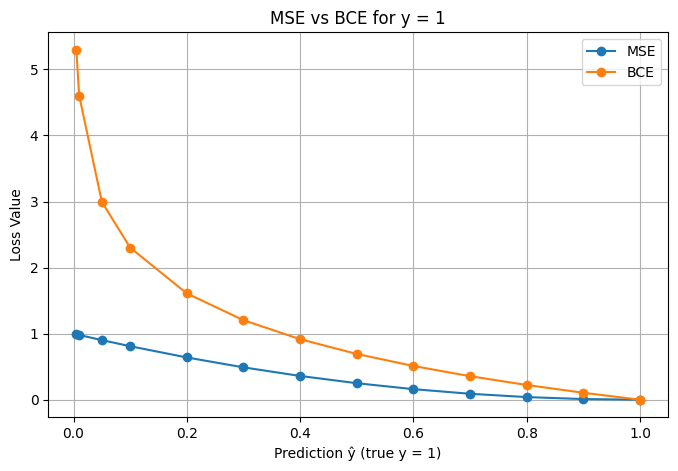

In [4]:
plt.figure(figsize=(8,5))
plt.plot(preds, mse, marker='o', label='MSE')
plt.plot(preds, bce, marker='o', label='BCE')
plt.xlabel('Prediction ŷ (true y = 1)')
plt.ylabel('Loss Value')
plt.title('MSE vs BCE for y = 1')
plt.legend()
plt.grid(True)
plt.show()

### Application 1 - continuous dependent variable (Linear Regression): MSE
MSE corresponds to the negative log-likelihood under Gaussian noise (appropriate model for many continuous targets), gives closed-form OLS solution and smooth squared-error gradients. Use RMSE/MAE/R² for evaluation.
### Application 2 - binary dependent variable (Logistic Regression): BCE
BCE is the negative log-likelihood for a Bernoulli target and matches the probabilistic model of logistic regression (sigmoid outputs). It gives well-behaved gradients for probability outputs and strongly penalizes confident, incorrect probability estimates. MSE is not theoretically correct for Bernoulli targets and can give poor probability calibration and slower/poorer convergence.

# Q3 : Data pre-processing

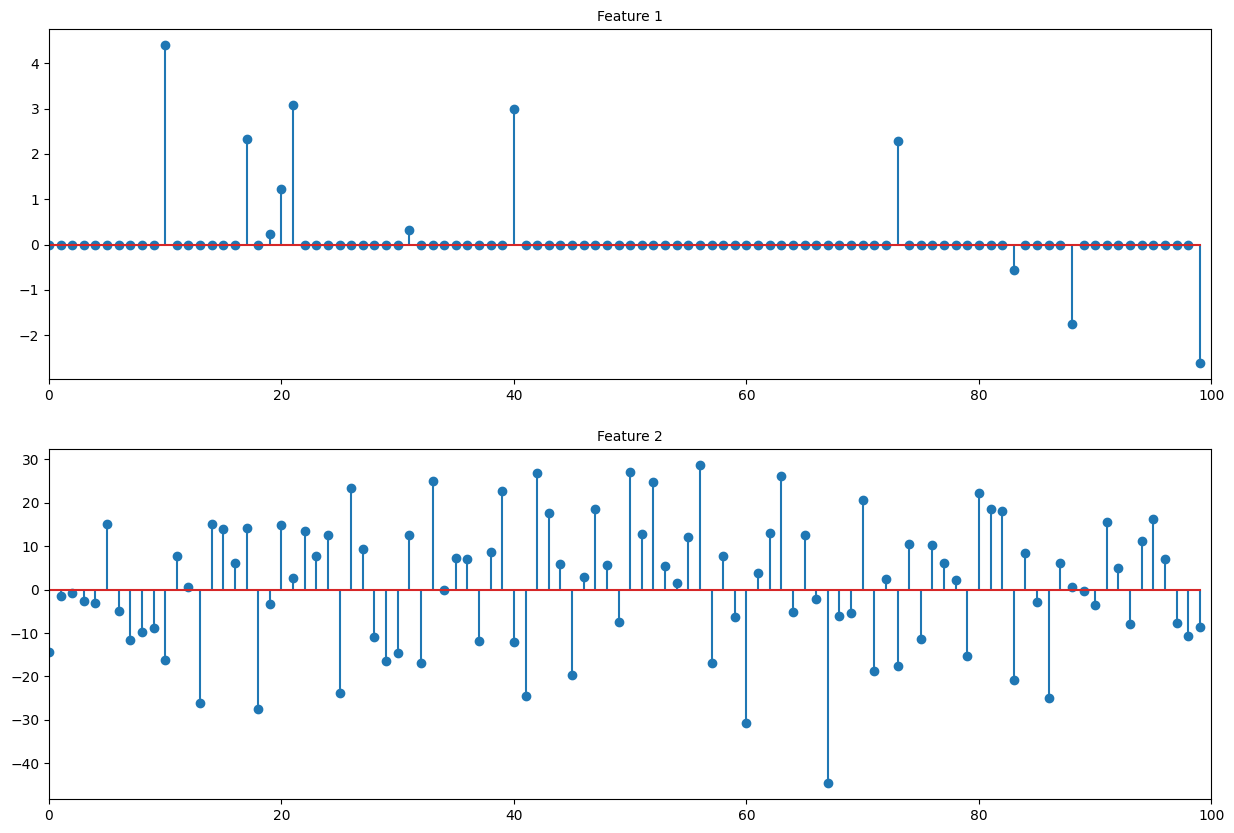

In [13]:
def generate_signal(signal_length, num_nonzero):
    signal = np.zeros(signal_length)
    nonzero_indices = np.random.choice(signal_length, num_nonzero, replace=False)
    nonzero_values = 10 * np.random.randn(num_nonzero)
    signal[nonzero_indices] = nonzero_values
    return signal

signal_length = 100
num_nonzero = 10
your_index_no = 220276  # Example index

sparse_signal = generate_signal(signal_length, num_nonzero)
sparse_signal[10] = (your_index_no % 10) * 2 + 10
if your_index_no % 10 == 0:
    sparse_signal[10] = np.random.randn(1) + 30
sparse_signal = sparse_signal / 5

epsilon = np.random.normal(0, 15, signal_length)

#epsilon=epsilon[:, np.newaxis]
plt.figure(figsize=(15,10))
plt.subplot(2, 1, 1)
plt.xlim(0, signal_length)
plt.title("Feature 1", fontsize=10)
plt.xticks(fontsize=10) # Adjust x-axis tick label font size
plt.yticks(fontsize=10)
plt.stem(sparse_signal)

plt.subplot(2, 1, 2)
plt.xlim(0, signal_length)
plt.title("Feature 2", fontsize=10)
plt.stem(epsilon)
plt.xticks(fontsize=10) # Adjust x-axis tick label font size
plt.yticks(fontsize=10)
plt.show()


In [7]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler


In [8]:
# ----- Scaling -----
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
maxabs_scaler = MaxAbsScaler()

f1_standard = standard_scaler.fit_transform(sparse_signal.reshape(-1, 1))
f1_minmax = minmax_scaler.fit_transform(sparse_signal.reshape(-1, 1))
f1_maxabs = maxabs_scaler.fit_transform(sparse_signal.reshape(-1, 1))

f2_standard = standard_scaler.fit_transform(epsilon.reshape(-1, 1))
f2_minmax = minmax_scaler.fit_transform(epsilon.reshape(-1, 1))
f2_maxabs = maxabs_scaler.fit_transform(epsilon.reshape(-1, 1))


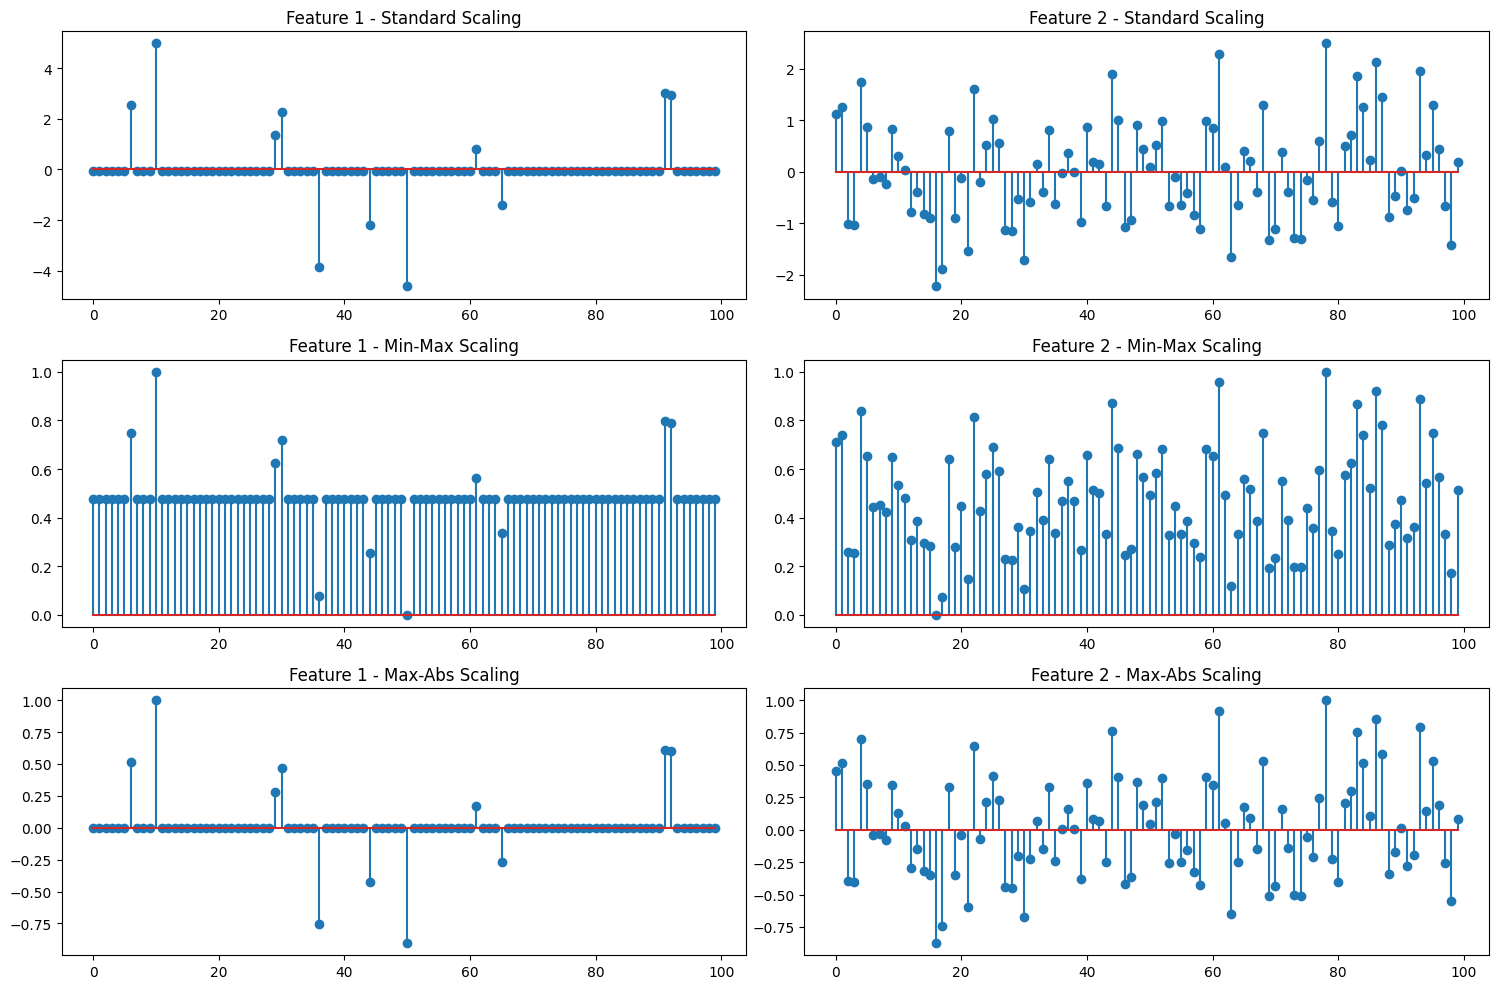

In [9]:
# ----- Plot -----
plt.figure(figsize=(15, 10))

# Feature 1
plt.subplot(3, 2, 1)
plt.title("Feature 1 - Standard Scaling")
plt.stem(f1_standard)

plt.subplot(3, 2, 3)
plt.title("Feature 1 - Min-Max Scaling")
plt.stem(f1_minmax)

plt.subplot(3, 2, 5)
plt.title("Feature 1 - Max-Abs Scaling")
plt.stem(f1_maxabs)

# Feature 2
plt.subplot(3, 2, 2)
plt.title("Feature 2 - Standard Scaling")
plt.stem(f2_standard)

plt.subplot(3, 2, 4)
plt.title("Feature 2 - Min-Max Scaling")
plt.stem(f2_minmax)

plt.subplot(3, 2, 6)
plt.title("Feature 2 - Max-Abs Scaling")
plt.stem(f2_maxabs)

plt.tight_layout()
plt.show()

#### Feature 1 (Sparse Signal):
- Standard Scaling changes the zero entries to non-zero values, destroying sparsity.
- Min-Max Scaling maps zeros to small positive values, still losing sparsity.
- Max-Abs Scaling preserves zeros and relative magnitudes → Best choice.

#### Feature 2 (Gaussian Noise):

- Standard Scaling maintains Gaussian distribution and variance normalization → Best choice.
- Min-Max Scaling rescales to [ 0, 1 ] but distorts distribution.
- Max-Abs Scaling doesn’t address variance properly.